# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1.	Loading the dataset.

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


from the above data we can see that there are 150 samples and 5 features.

#2.Missing Values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 7 missing values in SL and 6 each in SW and PL.

In [7]:
data['SL']= data['SL'].fillna(data['SL'].median())

In [8]:
for i in ['SW', 'PL']:
    data[i]= data[i].fillna(data[i].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now all the missing values are filled.

#3. Preprocessing

In [10]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['Classification']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])

We have performed labelencoding to the last Column to convert the object type to int type.

#4. splitting the data

In [15]:
y = data['Classification']
X = data.drop('Classification', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=42)

#5. Build the model-1

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import f1_score,confusion_matrix
print('The F1 score is:',f1_score(y_test,y_pred,average='macro'))
confusion_matrix(y_test,y_pred)

The F1 score is: 1.0


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

From the above F1 and confusion matrix value this model RandomForest can be used.

#6. Build the model-1

In [31]:
from sklearn.neighbors import KNeighborsClassifier
acc_value = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric ='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_value.append(acc)

In [32]:
acc_value

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Text(0, 0.5, 'accuracy')

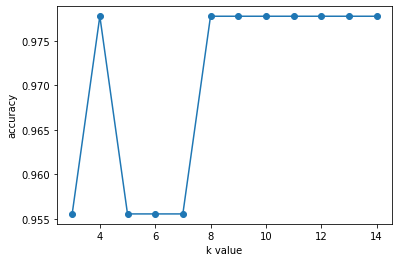

In [33]:
plt.plot(neighbors, acc_value,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric ='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [36]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('F1 is:', f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.9777777777777777
F1 is: 0.9786453119786453


In [37]:
confusion_matrix(y_test, y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)